In [2]:
"""Chapter 3 | Linear Regression applied exercises."""

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from ISLP import load_data
from ISLP.models import (
    ModelSpec as MS,
    summarize,
)
from statsmodels.stats.anova import anova_lm

In [3]:
# (a) Fit a multiple regression model to predict Sales using Price,
# Urban, and US.
carseats_data = load_data("Carseats")

terms = carseats_data[["Price", "Urban", "US"]]
X = MS(terms).fit_transform(carseats_data)
y = carseats_data["Sales"]
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

# (b) Provide an interpretation of each coefficient in the model. Be
# careful—some of the variables in the model are qualitative!

# For each unit increase in price, we should expect sales to drop
# by 0.0545 units, holding all variables constant. When an observation is
# from an urban area, sales decreases by 0.0219 units, holding all other
# variables constant. When the observation is from the US, sales increases
# by 1.2006 units, holding all other variables constant.

# (c) Write out the model in equation form, being careful to handle the
# qualitative variables properly.

# Sales = B0 + B1 * Price + B2 * Urban_Yes + B3 * US_Yes + e
# - B0 is the intercept.
# - B1 is the coefficient for the price variable
# - B2 is the coefficeint for the dummy variable Urban_Yes
# - B3 is the coefficeint for the dummy variable US_Yes
# - e is the error term

# (d) For which of the predictors can you reject the null hypothesis
# H0: βj = 0?

# Price and US_Yes both have extremely small p-values of 0 and therefore
# we can safely reject the null hypothesis H0: Bj = 0 for these two
# predictors.

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [6]:

# (e) On the basis of your response to the previous question, fit a
# smaller model that only uses the predictors for which there is evidence
# of association with the outcome.

terms = carseats_data[["Price", "US"]]
X = MS(terms).fit_transform(carseats_data)
y = carseats_data["Sales"]
model_2 = sm.OLS(y, X)
results_2 = model_2.fit()
summarize(results_2)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [19]:

# (f) How well do the models in (a) and (e) fit the data?
print(anova_lm(results, results_2))

# Both models appear to fit to the data very similarly as they have nearly
# identical sum of squared residuals.

print("Model (a) R^2", results.rsquared)
print("Model (e) R^2", results_2.rsquared)

# The models both do not fit the data very well. Both have R^2 roughly equal
# to 0.2393, which means a substantial amount of variation in the response
# variable remains unexplained (approximately 76.07%).


   df_resid          ssr  df_diff  ss_diff         F  Pr(>F)
0     396.0  2420.834671      0.0      NaN       NaN     NaN
1     397.0  2420.874462     -1.0 -0.03979  0.006525     NaN
Model (a) R^2 0.23927539218405525
Model (e) R^2 0.23926288842678545


In [20]:
# (g) Using the model from (e), obtain 95% confidence intervals for the
# coefficient(s).
print(results_2.conf_int(alpha=0.05))

                  0          1
intercept  11.79032  14.271265
Price      -0.06476  -0.044195
US[Yes]     0.69152   1.707766


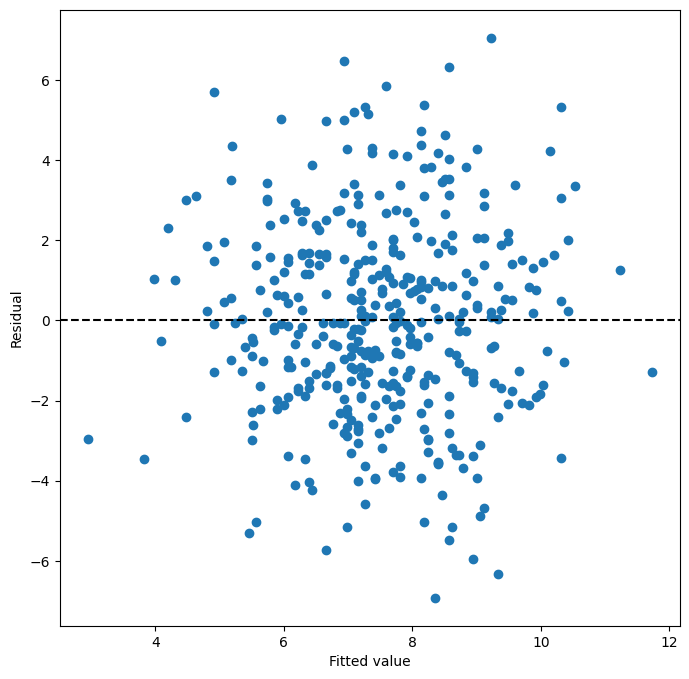

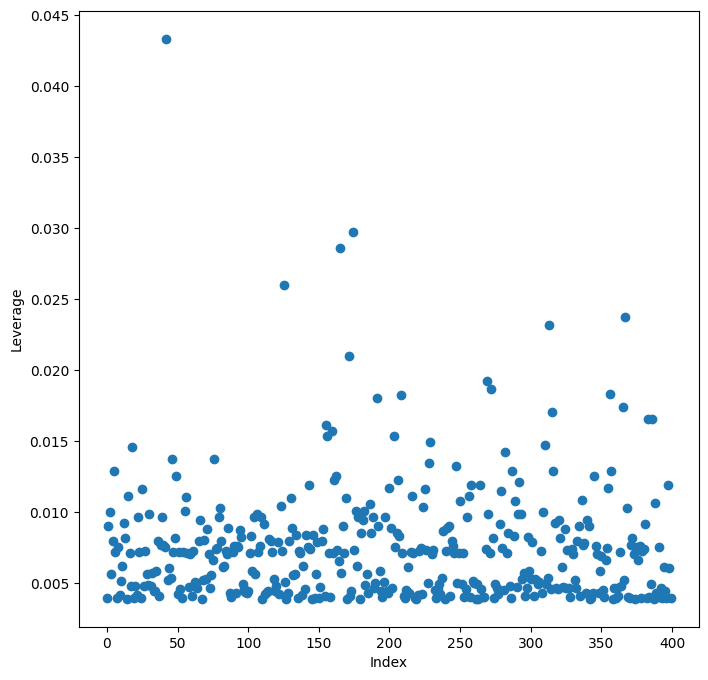

In [21]:
# (h) Is there evidence of outliers or high leverage observations in the
# model from (e)?

ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(results_2.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')
plt.show()

infl = results_2.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)
plt.show()

# There do not appear to be any notable outliers in the data. However,
# there does appear to be a notable high leverage observation towards the
# left side of the x-axis in the second plot.